In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Лабораторная работа №5

Введём унимодальную функцию $Q(x) = |x - 1|$ с минимумом в точке $x^* = 1$, рассматривать будем на отрезке $[a, \; b] = [-5, \; 5]$

In [2]:
def Q(x: float) -> float:
    return abs(x - 1)    

Отобразим её на графике

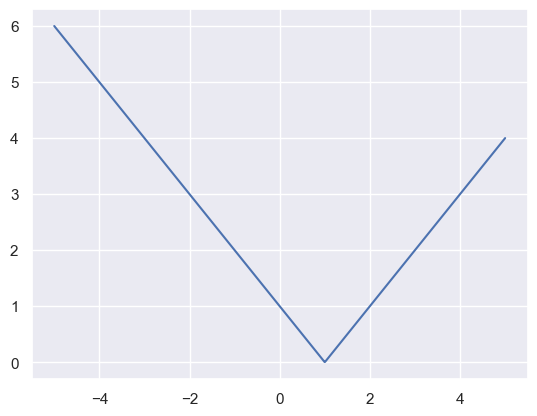

In [3]:
x = np.linspace(-5, 5, 1000)
y = Q(x)
plt.plot(x, y)
pass

## Метод дихотомии

Реализуем метод дихотомии. На вход будут приниматься функция $f$, границы отрезка $a$ и $b$, точность решения $\delta$. На выходе будет интервальная оценка решения $x^* \in [a^*, \; b^*]$, где $b^* - a^* \le \delta$. 

In [4]:
def dichotomi(f, a: float, b: float, delta: float) -> tuple[float]:
    c = 0.5 * (a + b)
    f_c = f(c)
    while b - a > delta:
        x = 0.5 * (a + c)
        f_x = f(x)
        y = 0.5 * (c + b)
        f_y = f(y)
        if f_x <= f_c < f_y:
            b = c
            c = x
            f_c = f_x
        elif f_x > f_c <= f_y:
            a = x
            b = y
        else:
            a = c
            c = y
            f_c = f_y
    return a, b

Запустим метод на нашей задаче с погрешностью $\delta=0.5$

In [5]:
a_star, b_star = dichotomi(Q, -5, 5, 0.5)
a_star, b_star

(0.78125, 1.09375)

Получили ответ $[a^*, \; b^*] = [0.78, \; 1.09]$, отобразим эти точки на графике

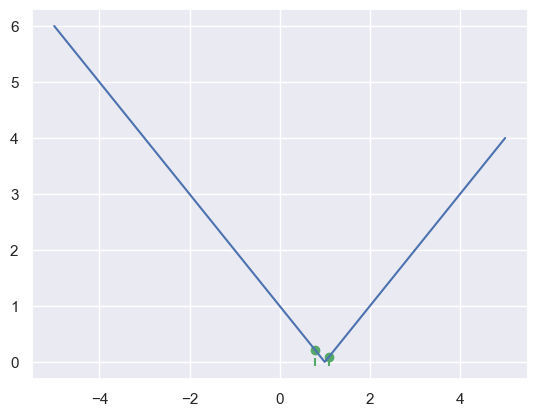

In [6]:
plt.plot(x, y)
plt.scatter(a_star, Q(a_star), c='g')
plt.scatter(b_star, Q(b_star), c='g')
plt.scatter(a_star, 0, marker='|', c='g')
plt.scatter(b_star, 0, marker='|', c='g')
pass

## Сравенение метода наискорейшего градиентного спуска и метода сопряжённых градиентов

Сравнение методов происходило с помощью программы LocOpt по числу итераций.

Метод наискорейшего градиентного спуска выигрывает по числу итераций, например, в следующей задаче:
$$
    Q(x_1, x_2) = |x_1-x_2|^3 + |x_2| + \cos{x_1 x_2} + \sqrt{x_1^2+x_2^2}
$$
$$
    -2 \le x_1 \le 1, \; -2 \le x_2 \le 1
$$
с начальной точкой $(-1.9,\; 0.5)$.

Метод сопряжённых градиентов выигрывает по числу итераций, например, в такой задаче:
$$
    Q(x_1, x_2) = e^{x_2^2-x_1} + 5(x_1-x_2^2)^2+(x_2-1)^2
$$
$$
    -1 \le x_1 \le 1.5, \; -1.25 \le x_2 \le 1.25
$$
с начальной точкой $(0.25, \; 0.5)$.